<h1>Regressão Linear</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('aptoN.csv')

In [3]:
df.describe()

/home/ciceromoura/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,m2,preco
count,34.000000,34.000000,29.000000
mean,85.088235,114.647059,277.068966
std,186.458927,44.142251,99.080750
min,2.000000,50.000000,100.000000
25%,13.250000,78.500000,NaN
50%,21.500000,100.000000,NaN
75%,29.750000,150.000000,NaN
max,988.000000,200.000000,500.000000


In [4]:
df.dtypes

id               int64
m2               int64
preco          float64
localizacao     object
dtype: object

In [5]:
df.head()

,id,m2,preco,localizacao
0,111,76,210.0,B
1,2,78,250.0,B
2,232,100,310.0,B
3,4,77,220.0,B
4,5,80,300.0,E


In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
df.describe()

,m2,preco
count,34.000000,29.000000
mean,114.647059,277.068966
std,44.142251,99.080750
min,50.000000,100.000000
25%,78.500000,NaN
50%,100.000000,NaN
75%,150.000000,NaN
max,200.000000,500.000000


In [8]:
df.dropna().describe()

,m2,preco
count,29.000000,29.000000
mean,112.862069,277.068966
std,42.625214,99.080750
min,50.000000,100.000000
25%,78.000000,210.000000
50%,100.000000,270.000000
75%,150.000000,350.000000
max,200.000000,500.000000


In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,m2,preco
count,29.000000,29.000000
mean,112.862069,277.068966
std,42.625214,99.080750
min,50.000000,100.000000
25%,78.000000,210.000000
50%,100.000000,270.000000
75%,150.000000,350.000000
max,200.000000,500.000000


In [11]:
df.localizacao.unique()

array(['B', 'E', 'R'], dtype=object)

In [12]:
df.shape

(29, 3)

In [13]:
df.loc[df['localizacao'] == 'R', 'localizacao'] = 0
df.loc[df['localizacao'] == 'B', 'localizacao'] = 1
df.loc[df['localizacao'] == 'E', 'localizacao'] = 2

In [14]:
df.localizacao.unique()

array([1, 2, 0], dtype=object)

In [15]:
df.dtypes

m2               int64
preco          float64
localizacao     object
dtype: object

In [16]:
df.localizacao = df.localizacao.astype('int64')
df.dtypes

m2               int64
preco          float64
localizacao      int64
dtype: object

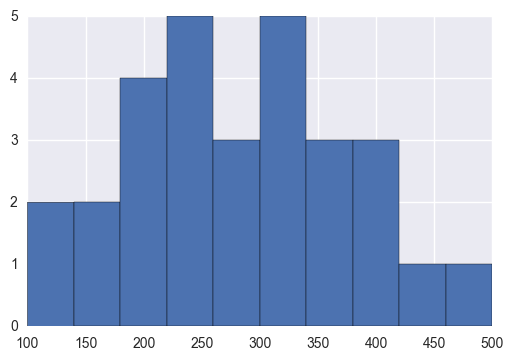

In [17]:
df.preco.hist()

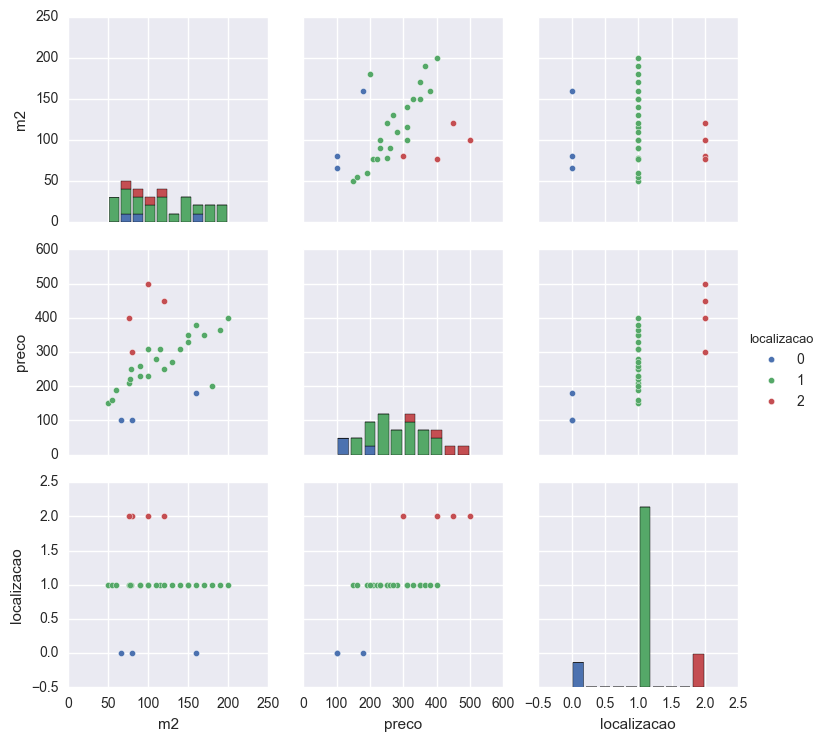

In [18]:
sb.pairplot(df, hue='localizacao')

In [19]:
df.corr(method='spearman')

,m2,preco,localizacao
m2,1.000000,0.540551,-0.049417
preco,0.540551,1.000000,0.651560
localizacao,-0.049417,0.651560,1.000000


In [20]:
df.cov()

,m2,preco,localizacao
m2,1816.908867,1991.188424,-1.530788
preco,1991.188424,9816.995074,35.461823
localizacao,-1.530788,35.461823,0.248768


<h2>Tranalhando com Numpy</h2>

In [21]:
# sklearn trabalha apenas com numpy não com pandas
valores = df[['m2', 'localizacao', 'preco']].values
valores

array([[  76.,    1.,  210.],
       [  78.,    1.,  250.],
       [ 100.,    1.,  310.],
       [  77.,    1.,  220.],
       [  80.,    2.,  300.],
       [  50.,    1.,  150.],
       [  55.,    1.,  160.],
       [  60.,    1.,  190.],
       [ 200.,    1.,  400.],
       [ 150.,    1.,  350.],
       [ 115.,    1.,  310.],
       [ 180.,    1.,  200.],
       [  80.,    0.,  100.],
       [ 100.,    1.,  230.],
       [  76.,    2.,  400.],
       [ 140.,    1.,  310.],
       [ 120.,    1.,  250.],
       [ 170.,    1.,  350.],
       [  90.,    1.,  260.],
       [ 110.,    1.,  280.],
       [ 190.,    1.,  365.],
       [ 120.,    2.,  450.],
       [  66.,    0.,  100.],
       [ 150.,    1.,  330.],
       [ 130.,    1.,  270.],
       [  90.,    1.,  230.],
       [ 160.,    0.,  180.],
       [ 100.,    2.,  500.],
       [ 160.,    1.,  380.]])

In [22]:
X = valores[:, 0:2]
X

array([[  76.,    1.],
       [  78.,    1.],
       [ 100.,    1.],
       [  77.,    1.],
       [  80.,    2.],
       [  50.,    1.],
       [  55.,    1.],
       [  60.,    1.],
       [ 200.,    1.],
       [ 150.,    1.],
       [ 115.,    1.],
       [ 180.,    1.],
       [  80.,    0.],
       [ 100.,    1.],
       [  76.,    2.],
       [ 140.,    1.],
       [ 120.,    1.],
       [ 170.,    1.],
       [  90.,    1.],
       [ 110.,    1.],
       [ 190.,    1.],
       [ 120.,    2.],
       [  66.,    0.],
       [ 150.,    1.],
       [ 130.,    1.],
       [  90.,    1.],
       [ 160.,    0.],
       [ 100.,    2.],
       [ 160.,    1.]])

In [23]:
Y = valores[:, np.newaxis, 2]
Y

array([[ 210.],
       [ 250.],
       [ 310.],
       [ 220.],
       [ 300.],
       [ 150.],
       [ 160.],
       [ 190.],
       [ 400.],
       [ 350.],
       [ 310.],
       [ 200.],
       [ 100.],
       [ 230.],
       [ 400.],
       [ 310.],
       [ 250.],
       [ 350.],
       [ 260.],
       [ 280.],
       [ 365.],
       [ 450.],
       [ 100.],
       [ 330.],
       [ 270.],
       [ 230.],
       [ 180.],
       [ 500.],
       [ 380.]])

<h3>Regressão Linear SkLearn</h3>

In [24]:
from sklearn import linear_model

In [25]:
regr = linear_model.LinearRegression()

In [26]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
valor1 = [200, 1]
valor2 = [200, 2]

valoresPredicao = [valor1, valor2]

In [28]:
regr.predict(valoresPredicao)

array([[ 378.40796812],
       [ 528.47921958]])

<h3>KnnRegressor</h3>

In [29]:
from sklearn import neighbors

In [30]:
knnR = neighbors.KNeighborsRegressor()

In [31]:
knnR.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
knnR.predict(valoresPredicao)

array([[ 339.],
       [ 339.]])